##Projeto Labdata - Tratamento e análises dos dados - Big Ben Multimarket
![Imagem Big Ben](https://s1.static.brasilescola.uol.com.br/be/conteudo/images/big-ben.jpg)

Participantes:

**Danielle Faria**<br>
**Juliana Souza**<br>
**Maurício Mourão**<br>
**Rafael Talaveira**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [0]:
# Puxar a base
df = spark.read.csv("/FileStore/tables/Retail.CSV", header=True, sep=';', inferSchema=True)
df = df.toPandas()

In [0]:
# Informações do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int32  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  object 
 6   customer_id   406829 non-null  float64
 7   region        541909 non-null  object 
dtypes: float64(1), int32(1), object(6)
memory usage: 31.0+ MB


In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,"3,39",17850.0,United Kingdom


In [0]:
# Retirar valores com Zeros e Negativos
df_no_0 = df[df['unit_price'] > '0']
df_no_0 = df_no_0[df_no_0['quantity'] > 0]

In [0]:
# Verificação sem Zeros e Negativos
df_no_0.groupby('unit_price').count().sort_values('unit_price', ascending=False)

,invoice_no,stock_code,description,quantity,invoice_date,customer_id,region
unit_price,,,,,,,
"99,96",2,2,2,2,2,0,2
988,1,1,1,1,1,0,1
"98,79",1,1,1,1,1,0,1
"98,75",1,1,1,1,1,0,1
"98,54",1,1,1,1,1,0,1
...,...,...,...,...,...,...,...
"0,08",55,55,55,55,55,55,55
"0,07",7,7,7,7,7,7,7
"0,06",116,116,116,116,116,112,116


In [0]:
# Agrupar por região e contagem de quantidade de linhas
df_no_0.groupby('region').agg(n=('quantity', 'count')).sort_values('n', ascending=False).reset_index()
# Aqui definimos que trabalharemos só com países da Europa

,region,n
0,United Kingdom,485123
1,Germany,9040
2,France,8407
3,EIRE,7890
4,Spain,2484
5,Netherlands,2359
6,Belgium,2031
7,Switzerland,1966
8,Portugal,1501
9,Australia,1182


In [0]:
# Tratar virgulas para ponto para converter para Float
df_no_0['unit_price'] = df_no_0['unit_price'].apply(lambda x: float(x.replace(".","").replace(",",".")))

In [0]:
# Converter para Float
df_no_0['unit_price'] = df_no_0['unit_price'].astype(float)

In [0]:
# Multiplica o valor unitário pela quantidade de itens criando uma nova coluna
df_receita = df_no_0.assign(total_price = lambda x: x['quantity'] * x['unit_price'])

In [0]:
df_receita.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,20.34


## Filtrando apenas Europa

In [0]:
# Lista com os nomes de todos os países da Europa
paises_europa = ["Albania", "Andorra", "Austria", "Belarus", "Belgium", "BosniaandHerzegovina", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "NorthMacedonia", "Norway", "Poland", "Portugal", "Romania", "Russia", "SanMarino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom", "VaticanCity", "EIRE", "European Community", "Channel Islands"]

In [0]:
# Cria a coluna continent e colocar Europa nos paises da Europa e Outros nos demais
df_receita.insert(9, 'continent', '')

In [0]:
df_receita['continent'] = df_receita['region'].apply(lambda x: 'Europa' if x in paises_europa else 'Outros Continentes')

In [0]:
# Tirar as duplicadas para a contagem
df_no_duplicates = df_receita[['invoice_no', 'region', 'continent']].drop_duplicates()
df_no_duplicates.head()

,invoice_no,region,continent
0,536365,United Kingdom,Europa
7,536366,United Kingdom,Europa
9,536367,United Kingdom,Europa
21,536368,United Kingdom,Europa
25,536369,United Kingdom,Europa


In [0]:
# Mostrar valores por continentes
df_nums = df_no_duplicates.groupby('continent').agg(n=('continent', 'count')).sort_values('n', ascending=False).reset_index()

df_nums.head()

,continent,n
0,Europa,19824
1,Outros Continentes,136


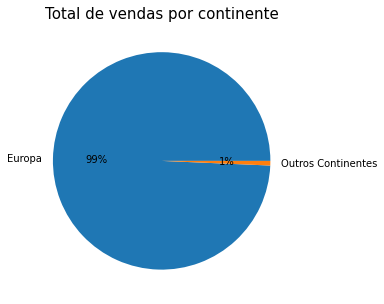

In [0]:
# Representação gráfica em porcentagem
fig, ax = plt.subplots(figsize=(10, 5))
plt.pie(df_nums['n'], labels = df_nums['continent'], autopct='%.0f%%')
plt.title('Total de vendas por continente', fontsize = 15)
plt.show()

In [0]:
# Filtrou apenas paises da Europa
df_europe = df_receita[df_receita['continent'] == "Europa"]
df_europe.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total_price,continent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom,15.30,Europa
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,20.34,Europa
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom,22.00,Europa
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,20.34,Europa
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,20.34,Europa


In [0]:
# Pedidos por país Europa
df_paises_europa = df_europe.groupby('region').agg(n=('invoice_no', 'count')).sort_values('n', ascending=False).reset_index()
df_paises_europa.head(30)

,region,n
0,United Kingdom,485123
1,Germany,9040
2,France,8407
3,EIRE,7890
4,Spain,2484
5,Netherlands,2359
6,Belgium,2031
7,Switzerland,1966
8,Portugal,1501
9,Norway,1071


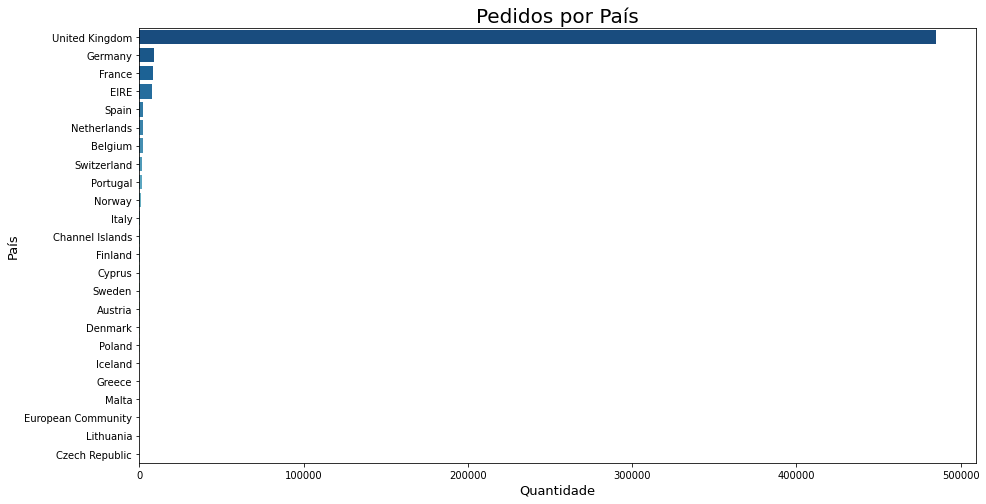

In [0]:
# Plot pedidos por país Europa
fig, ax = plt.subplots(figsize=(15, 8))

graph7 = sns.barplot(data=df_paises_europa, y='region', x='n', ax=ax, palette = "GnBu_r");
ax.set_ylabel('País', fontsize=13);
ax.set_xlabel('Quantidade', fontsize=13);
ax.set_title('Pedidos por País', fontsize=20);

## Gráficos

#### Produtos Mais Vendidos

In [0]:
# Separar código e produto para plotagem
df_produtos = df_europe.groupby(['stock_code', 'description']).agg(n=('stock_code', 'count')).sort_values('n', ascending=False).reset_index()

In [0]:
# Top 10 produtos mais comprados
df_produtos_10p = df_produtos.nlargest(10, 'n')

df_produtos_10p.head(20)

,stock_code,description,n
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2251
1,85099B,JUMBO BAG RED RETROSPOT,2104
2,22423,REGENCY CAKESTAND 3 TIER,1995
3,47566,PARTY BUNTING,1690
4,20725,LUNCH BAG RED RETROSPOT,1580
5,84879,ASSORTED COLOUR BIRD ORNAMENT,1485
6,22720,SET OF 3 CAKE TINS PANTRY DESIGN,1386
7,21212,PACK OF 72 RETROSPOT CAKE CASES,1362
8,20727,LUNCH BAG BLACK SKULL.,1322
9,22457,NATURAL SLATE HEART CHALKBOARD,1261


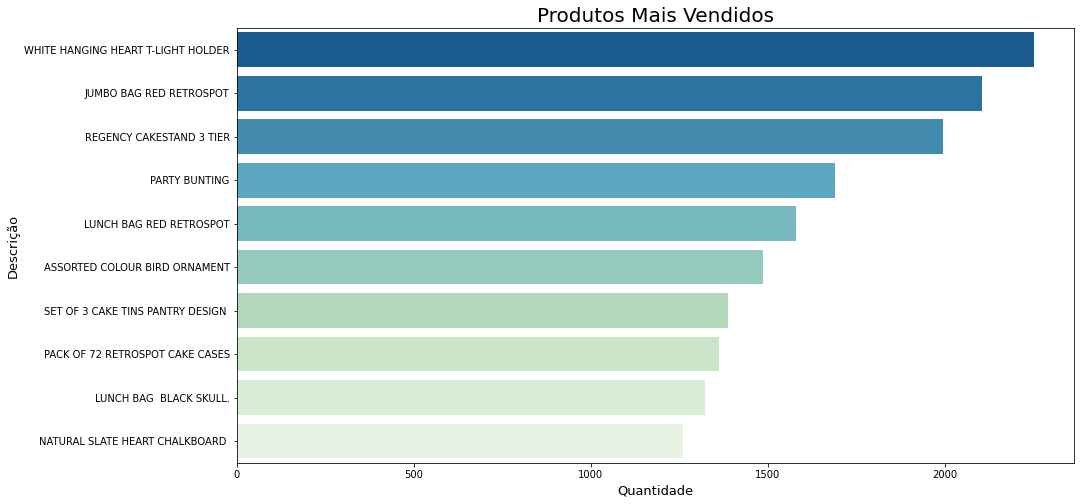

In [0]:
# Plotagem por nome do produto
fig, ax = plt.subplots(figsize=(15, 8))

graph_mais_vendidos = sns.barplot(data=df_produtos_10p, y='description', x='n', ax=ax, palette = "GnBu_r");
ax.set_ylabel('Descrição', fontsize=13);
ax.set_xlabel('Quantidade', fontsize=13);
ax.set_title('Produtos Mais Vendidos', fontsize=20);

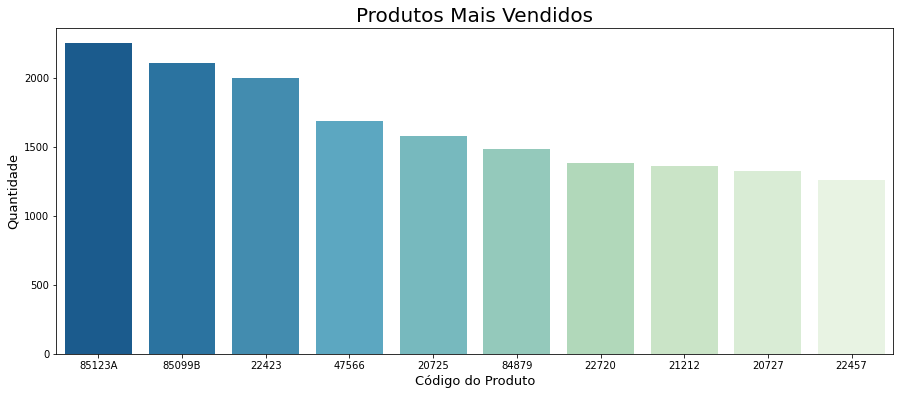

In [0]:
# Plotagem por código
fig, ax = plt.subplots(figsize=(15, 6))

graph2 = sns.barplot(data=df_produtos_10p, x='stock_code', y='n', ax=ax, palette = "GnBu_r");
ax.set_ylabel('Quantidade', fontsize=13);
ax.set_xlabel('Código do Produto', fontsize=13);
ax.set_title('Produtos Mais Vendidos', fontsize=20);

####Valor Total por Venda

In [0]:
# Selecionar colunas para o grafico
df_pedidos = df_europe[['invoice_no', 'quantity', 'total_price']]

In [0]:
# Somar quantidade e valores por pedido
df_out = df_pedidos.groupby(['invoice_no']).sum().sort_values('total_price', ascending=False).reset_index()
df_out.head()

,invoice_no,quantity,total_price
0,581483,80995,168469.60
1,541431,74215,77183.60
2,574941,14149,52940.94
3,576365,13956,50653.91
4,556444,60,38970.00


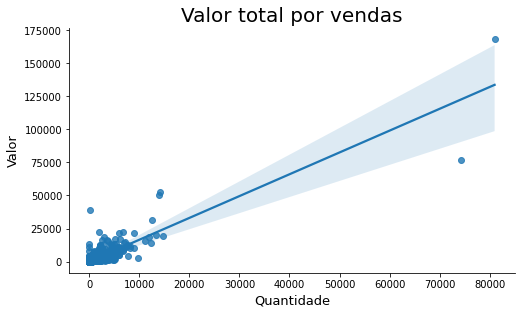

In [0]:
# Plotagem do gráfico
graph_valor_vendas = sns.lmplot(
    data=df_out, x="quantity", y="total_price",
    facet_kws=dict(sharex=False, sharey=False) 
)
plt.title('Valor total por vendas', fontsize = 20)
plt.xlabel('Quantidade', fontsize = 13)
plt.ylabel('Valor', fontsize = 13)
graph_valor_vendas.figure.set_size_inches(8,4);
# Existem alguns pedidos que os valores estão destuando dos valores médios 

####Identificar Consumo por Cliente

In [0]:
df_europe.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total_price,continent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom,15.30,Europa
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,20.34,Europa
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom,22.00,Europa
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,20.34,Europa
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,20.34,Europa


In [0]:
# Pegando colunas necesarias
df_cliente = df_europe[['customer_id', 'total_price']]

In [0]:
# Somar quantidade e valores dos pedidos por cliente
df_valor_cliente = df_cliente.groupby(['customer_id']).sum().sort_values('total_price', ascending=False).reset_index()
df_valor_cliente.head()

,customer_id,total_price
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194550.79
3,16446.0,168472.50
4,14911.0,143825.06


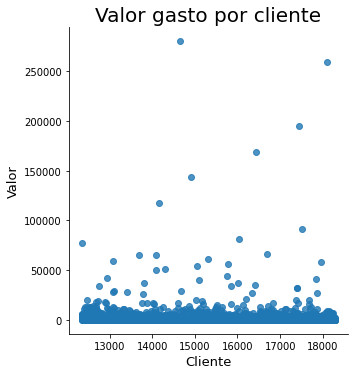

In [0]:
# Plotagem do gráfico de valor gasto por cliente
sns.lmplot(
    data = df_valor_cliente, x="customer_id", y="total_price",
    facet_kws=dict(sharex=False, sharey=False) 
)
plt.title('Valor gasto por cliente', fontsize = 20)
plt.xlabel('Cliente', fontsize = 13)
plt.ylabel('Valor', fontsize = 13);

In [0]:
# Análise de quartis e outliers
# Agrupar pelo ID do cliente e somar o valor gasto nos pedidos
df_quartis = df_cliente.groupby(['customer_id']).sum().sort_values('total_price', ascending=False).reset_index()

Q1 = np.quantile(df_quartis['total_price'], 0.25)
Q3 = np.quantile(df_quartis['total_price'], 0.75)

IQR = Q3 - Q1

# Definir elementos do 1º quartil
lim_inf = np.where(df_quartis['total_price'] <= (Q1-1.5*IQR))
# Definir elementos do 3º quartil
lim_sup = np.where(df_quartis['total_price'] >= (Q3+1.5*IQR))

# Remover outliers
df_quartis.drop(lim_inf[0], inplace = True)
df_quartis.drop(lim_sup[0], inplace = True)
#media = df_quartis.mean('total_price')

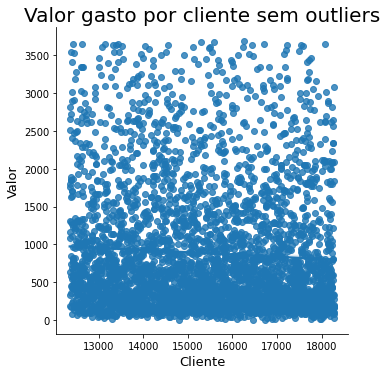

In [0]:
# Plotagem do gráfico de valor gasto por clientes sem outliers
sns.lmplot(
    data = df_quartis, x="customer_id", y="total_price",
    facet_kws=dict(sharex=False, sharey=False) 
)
plt.title('Valor gasto por cliente sem outliers', fontsize = 20)
plt.xlabel('Cliente', fontsize = 13)
plt.ylabel('Valor', fontsize = 13);

In [0]:
# Criar lista de clientes com maior volume de itens comprados
# Filtrar o df
df_vendas = df_europe.filter(['customer_id', 'quantity', 'total_price'])

# Agrupar pelo ID do cliente e somar a quantidade de itens comprados
df_vendas = df_vendas.groupby(['customer_id','total_price']).sum().sort_values('quantity', ascending=False).reset_index()

# Definir o top 10 clientes com mais pedidos
df_top10_clientes = df_vendas.nlargest(10, 'quantity')

df_top10_clientes.head(20)

,customer_id,total_price,quantity
0,16446.0,168469.60,80995
1,12346.0,77183.60,74215
2,15311.0,179.00,7600
3,14646.0,139.20,7200
4,14646.0,145.00,6600
5,17511.0,179.00,6400
6,15749.0,6539.40,6228
7,14646.0,144.00,6000
8,16422.0,180.00,5808
9,16333.0,241.92,5760


##Projeto Labdata - Apresentação de resultados e insights - Big Ben Multimarket
![Imagem Big Ben](https://s1.static.brasilescola.uol.com.br/be/conteudo/images/big-ben.jpg)

##Análise de vendas por região
> - Definição de nova estratégia em relação ao território de vendas<br>
> - Redução de custos a partir do encerramento de atividades em regiões com baixa demanda<br>
> - Atendimento focado para países da Europa

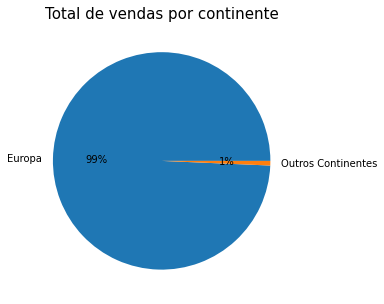

In [0]:
# Representação gráfica em porcentagem
fig, ax = plt.subplots(figsize=(10, 5))
plt.pie(df_nums['n'], labels = df_nums['continent'], autopct='%.0f%%')
plt.title('Total de vendas por continente', fontsize = 15)
plt.show()

##Análise de pedidos por país
> - Centro de distribuição no Reino Unido, possibilitando entregas mais rápidas para o país mais demandante e facilitando o acesso aos demais <br>
> - Criação de campanhas para aumentar o volume de vendas no top 3 países que mais vendem, após o Reino Unido (Alemanha, França e Irlanda)

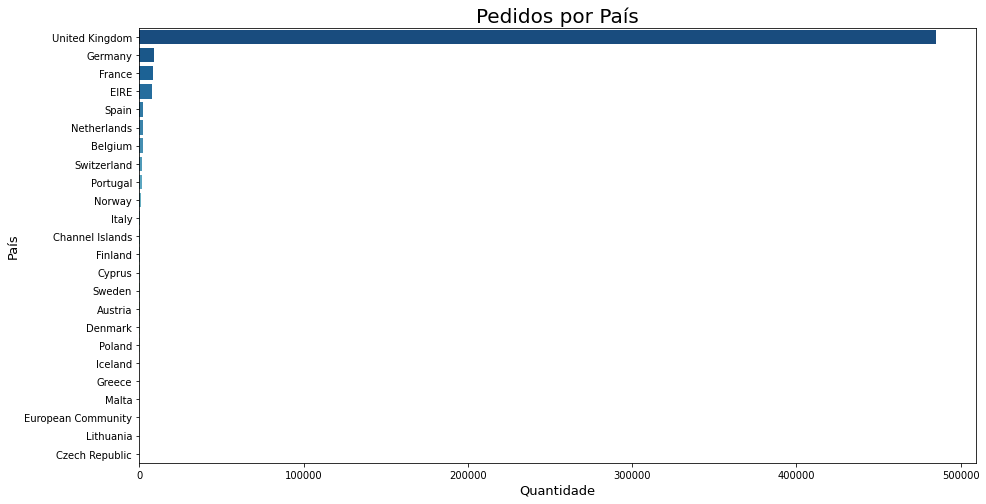

In [0]:
# Plot pedidos por país Europa
fig, ax = plt.subplots(figsize=(15, 8))

graph7 = sns.barplot(data=df_paises_europa, y='region', x='n', ax=ax, palette = "GnBu_r");
ax.set_ylabel('País', fontsize=13);
ax.set_xlabel('Quantidade', fontsize=13);
ax.set_title('Pedidos por País', fontsize=20);

##Análise de produtos mais vendidos
> - Foco nos produtos que possuem maior quantidade de vendas <br>
> - Criação de estratégia de aumento de estoque para produtos com mais saída, e redução de estoque para produtos com menos vendas

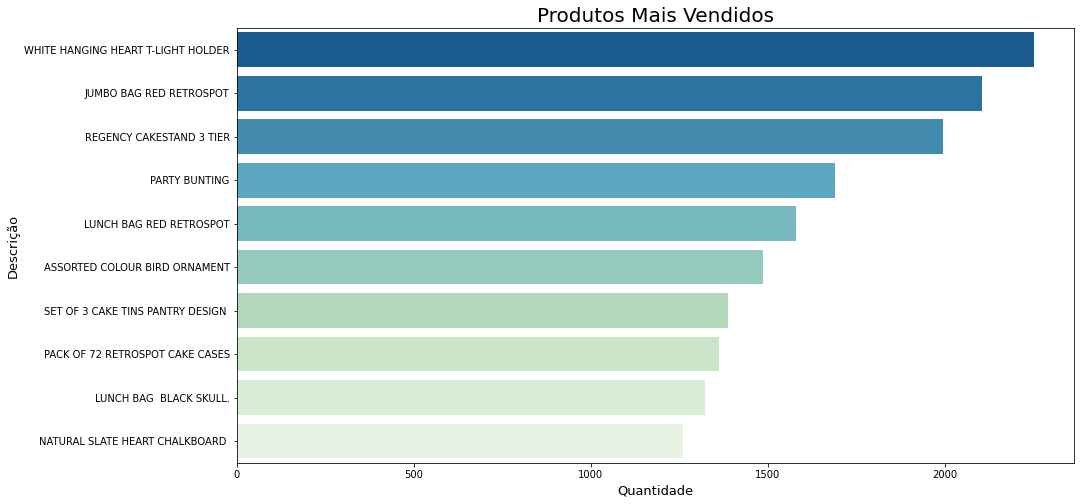

In [0]:
# Plotagem por nome do produto
fig, ax = plt.subplots(figsize=(15, 8))

graph = sns.barplot(data=df_produtos_10p, y='description', x='n', ax=ax, palette = "GnBu_r");
ax.set_ylabel('Descrição', fontsize=13);
ax.set_xlabel('Quantidade', fontsize=13);
ax.set_title('Produtos Mais Vendidos', fontsize=20);

##Análise de vendas por valor e por cliente
> - Visualização dos outliers por valor gasto pelos clientes<br>
> - Criação de campanhas para envio de brindes e descontos para os clientes que mais compram<br>
> - Desconto e/ou frete grátis para os clientes que possuem poucas compras<br>
> - Desconto para clientes com pedidos de valores altos

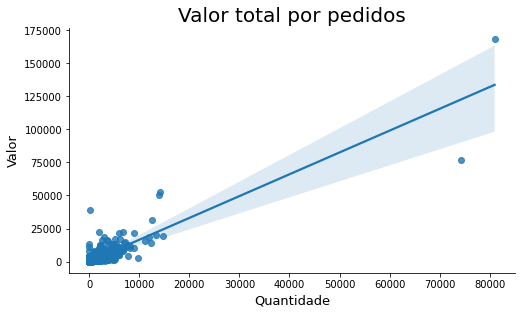

In [0]:
# Plotagem do gráfico
graph_valor_vendas = sns.lmplot(
    data=df_out, x="quantity", y="total_price",
    facet_kws=dict(sharex=False, sharey=False) 
)
plt.title('Valor total por pedidos', fontsize = 20)
plt.xlabel('Quantidade', fontsize = 13)
plt.ylabel('Valor', fontsize = 13)
graph_valor_vendas.figure.set_size_inches(8,4);
# Existem alguns pedidos que os valores estão destoando dos valores médios 

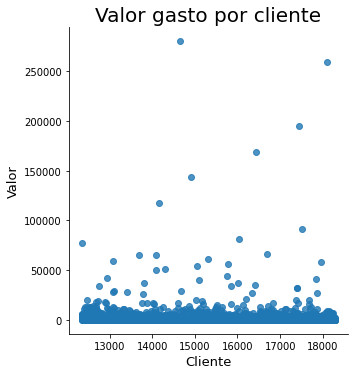

In [0]:
# Plotagem do gráfico de clientes
sns.lmplot(
    data = df_valor_cliente, x="customer_id", y="total_price",
    facet_kws=dict(sharex=False, sharey=False) 
)
plt.title('Valor gasto por cliente', fontsize = 20)
plt.xlabel('Cliente', fontsize = 13)
plt.ylabel('Valor', fontsize = 13);

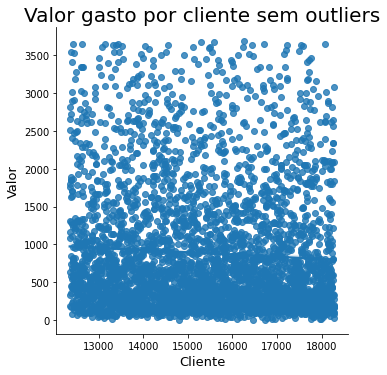

In [0]:
# Plotagem do gráfico de valor gasto pelos clientes sem outliers
sns.lmplot(
    data = df_quartis, x="customer_id", y="total_price",
    facet_kws=dict(sharex=False, sharey=False) 
)
plt.title('Valor gasto por cliente sem outliers', fontsize = 20)
plt.xlabel('Cliente', fontsize = 13)
plt.ylabel('Valor', fontsize = 13);